# Tokenization Coding

Tokenizing breaks down sentences into words. To do this with PySpark, we'll use the PySpark Machine Learning (ML) library. Start by creating a new notebook, installing Spark, and creating a SparkSession, as demonstrated in the following code:

In [ ]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Tokens").getOrCreate()

Next, we'll import the Tokenizer library. Type and run the following code:

In [ ]:
from pyspark.ml.feature import Tokenizer

Spark gives us the ability to create a DataFrame from scratch as well. Although you'll mainly use DataFrames imported from data, the ability to create quick, small DataFrames allows for quick, easy testing. We'll create a small DataFrame that will show the pre-tokenized data, using the following code:

In [ ]:
# Create Sample Dataframe
dataframe = spark.createDataFrame([
    (0, 'Spark is Great'),
    (1, 'We are learning Spark'),
    (2, 'Spark is better thatn hadoop no doubt')
], ['id','sentence'])

datframe.show()


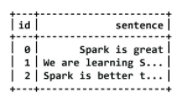

The tokenizer function takes input and output parameters. The input passes the name of the column that we want to have tokenized, and the output takes the name that we want the column called. Type and run the following code:

In [ ]:
# Tokenize sentences
tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
tokenizer

The tokenizer that we created uses a transform method that takes a DataFrame as input. This is a transformation, so to reveal the results, we'll call show(truncate=False) as our action to display the results without shortening the output, as shown below:



In [ ]:
# Transform and show Dataframe
tokenized_df = tokenizer.transform(dataframe)
tokenized_df.show(truncate=False)

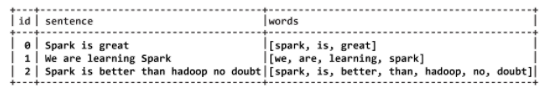

To summarize, we started with a DataFrame that contained full sentences (the big task), then ran the tokenizer to break the text down to a list of words (small task).

### NOTE
You may notice that the tokenizer looks similar to the split() method in Python.

## User-defined functions (UDFs)
User-defined functions (UDFs) are functions created by the user to add custom output columns.

For the example below, we can create a function that will enhance our tokenizer by returning a word count for each line. Start by creating a Python function that takes a list of words as its input, then returns the length of that list. Type and run the following code:

In [ ]:
# Create a function to return the length of a list
def word_list_length(word_list):
    return len(word_list)

Next, we'll import the udf function, the col function to select a column to be passed into a function, and the type IntegerType that will be used in our udf to define the data type of the output, as follows:

In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

Using the udf function, we can create our function to be passed in. The udf will take in the name of the function as a parameter and the output data type, which is the IntegerType that we just imported. Type and run the following code:

In [ ]:
# Create a user defined function
count_tokens = udf(word_list_length, IntegerType())

Now we can redo the tokenizer process. Only this time, after the DataFrame has outputted the tokenized values, we can use our own created function to return the number of tokens created. This will give us another data point to use in the future, if needed. Type and run the following code:

In [ ]:
# Create our Tokenizer
tokenizer = Tokenizer(inputCol='sentence', outputCol='words')

In [ ]:
# Transform DataFrame
tokenized_df = tokenizer.transform(dataframe)

In [ ]:
# Select the needed columns nad don't truncate results
tokenized_df.withColumn('tokens', count_tokens(col('words'))).show(truncate=False)

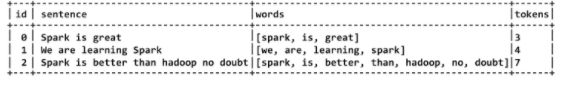